In [ ]:
import scipy.io as sio

# Load the .mat file
fc_data = sio.loadmat('../data/fc.mat')
fadhd_data = sio.loadmat('../data/fadhd.mat')
mc_data = sio.loadmat('../data/mc.mat')
madhd_data = sio.loadmat('../data/madhd.mat')

Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'FC'])


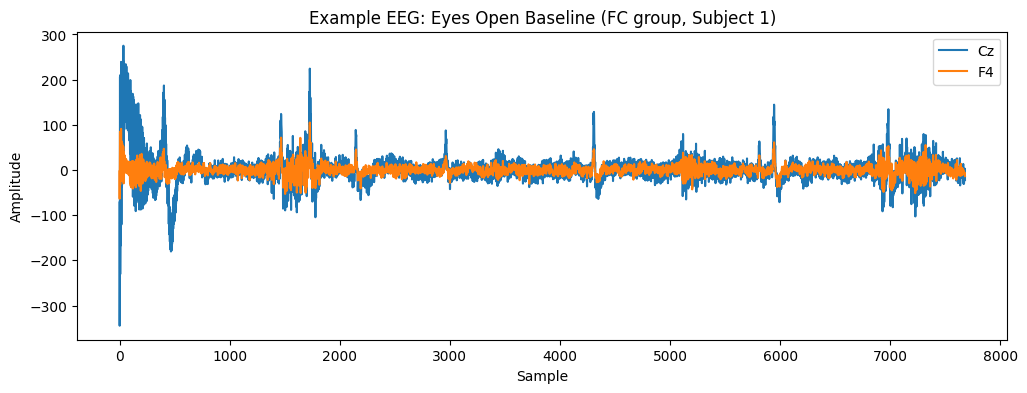

In [5]:
# Plot example "eyes open" EEG data from FC group, cell 1 (Eyes open baseline)

import matplotlib.pyplot as plt
import numpy as np

# Access the data: cell 1 (index 0), first subject (index 0)
fc_cell1 = fc_data['FC'][0, 0]  # Use the correct key 'FC'
eeg_sample = fc_cell1[0]        # first subject

# eeg_sample shape: (subjects, samples, channels)
# If shape is (13, 7680, 2), select first subject:
if eeg_sample.shape[0] == 13:
    eeg_signal = eeg_sample[0]  # shape: (7680, 2)
else:
    eeg_signal = eeg_sample     # fallback

# Plot both channels
plt.figure(figsize=(12, 4))
plt.plot(eeg_signal[:, 0], label='Cz')
plt.plot(eeg_signal[:, 1], label='F4')
plt.title('Example EEG: Eyes Open Baseline (FC group, Subject 1)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

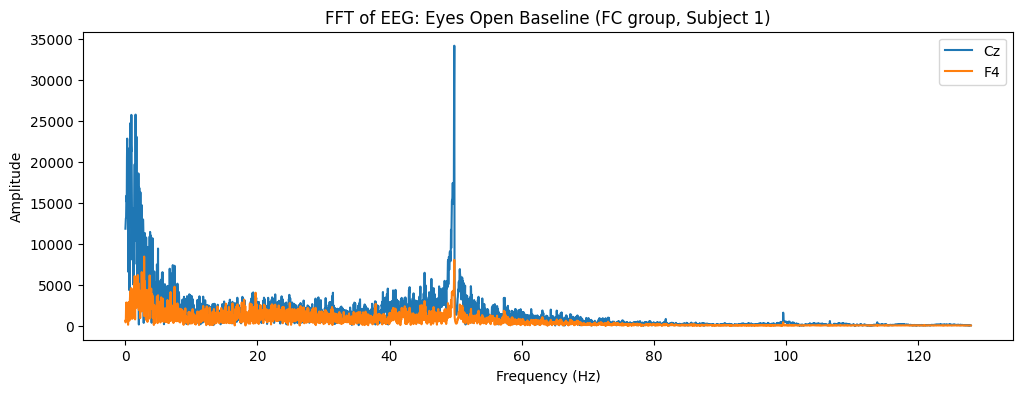

In [6]:
# FFT and plot for both channels of the same EEG signal

from scipy.fft import fft, fftfreq

# Parameters
fs = 256  # Sampling frequency in Hz (adjust if different)
n = eeg_signal.shape[0]  # Number of samples

# FFT for both channels
fft_cz = fft(eeg_signal[:, 0])
fft_f4 = fft(eeg_signal[:, 1])
freqs = fftfreq(n, 1/fs)

# Only keep the positive frequencies
pos_mask = freqs > 0

plt.figure(figsize=(12, 4))
plt.plot(freqs[pos_mask], np.abs(fft_cz[pos_mask]), label='Cz')
plt.plot(freqs[pos_mask], np.abs(fft_f4[pos_mask]), label='F4')
plt.title('FFT of EEG: Eyes Open Baseline (FC group, Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()